<a href="https://colab.research.google.com/github/Sharonayodele/sales_prediction_big_mart/blob/main/sales_preduction_big_mart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Mart Sales Prediction Using Machine Learning

### Project Overview:
The Big Mart Sales Analysis Project is aimed at understanding the factors influencing product sales across multiple stores in a retail chain. This analysis involves exploring various features such as product characteristics, store details, and historical sales data to gain actionable insights that can help predict and improve sales performance.

### Objective:
- The primary goal of the project is to use regression machine learning algorithms to build a robust predictive model that can accurately forecast product sales based on multiple features.
- To analyze the historical sales data to identify patterns and relationships in the dataset.


### Tools and Technologies Used:

- Programming Language: Python
- Machine Learning Algorithms: Linear Regression, Random Forest, XGBoost, Decision Trees, Neural network
- Data Processing: Pandas, NumPy
- Data Visualization: Matplotlib, Seaborn
- Model Evaluation: Cross-validation, MAE, R2_score, Hyperparameter tuning

### Methodology:

1. Load the data: The dataset consists of various features, including product attributes, store details, and historical sales performance.

2. Exploratory Data Analysis (EDA):
- Visualizing the distribution of product descriptions and sales.(e.g., histograms, box plots, and scatter plots)
- Analyzing correlations between features (like product weight, store size, or region).
- Statistical techniques, such as correlation analysis, were used to identify relationships between features and the target variables.

3. Data Preprocessing:
 - Data cleaning techniques were applied to handle missing values and ensure consistency in the data for reliable analysis.
- Handling missing data using univariate and multivariate imputation.

4. Feature Engineering:
- New features were created to improve model performance, such as grouping products into broader categories.
- Categorical variables, such as product type, were encoded to prepare them for modeling.

5. Model Development:
- Several machine learning algorithms were applied to predict sales, including linear regression, random forests, and gradient boosting models (e.g., XGBoost).
- Model performance was evaluated using metrics such as Mean Absolute Error (MAE) and R² to determine the accuracy of predictions.

6. Model Optimization and Evaluation:
This involved:
- Hyperparameter tuning to improve model accuracy.
- Cross-validation to avoid overfitting.

7. Insights and Recommendations:

- Based on the model's predictions and the insights derived from EDA, recommendations were made regarding key drivers of sales to providine valuable insights for marketing and operations teams.
- Sales for each product in the multiple tores could be predicted.

8. Results and Business Impact:
- The predictive model developed in this project achieved a high degree of accuracy in forecasting sales.
- Additionally, the project provided a gui for making sales preeictions.

The final model serves as a strategic tool for optimizing product offerings and estimating sales forecast, thereby enhancing the overall efficiency of the retail operations.


## Data Loading

In [ ]:
#Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# load the dataset from cvs file to a pandas dataframe
big_mart = pd.read_csv("/content/Train.csv")


In [ ]:
big_mart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The target column is the "Item_outlet_sales".

###Find the shape of our dataset

In [ ]:
big_mart.shape

(8523, 12)

## Exploratory Data Analysis

### Descriptive Analysis: Get information about the dataset
This provides inofmration on the numerical columns including the missing data, column type, datatypes, total number of rows



In [ ]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Check for null values

In [ ]:
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


There are 2 columns with missing values. "Item_weight" and "outlet_size"


##Varaible distribution
Graphical aprroach to examine the data.


### 1. Item_Weight vs Item_Visibility

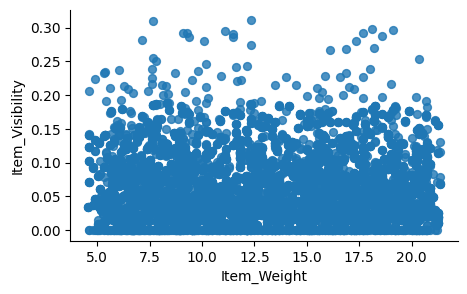

In [ ]:
big_mart.plot(figsize=(5,3),kind='scatter', x='Item_Weight', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2. Item_Visibility vs Item_MRP

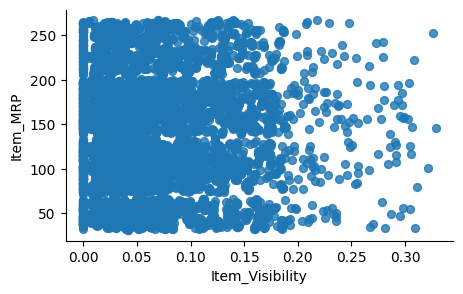

In [ ]:
big_mart.plot(figsize=(5,3),kind='scatter', x='Item_Visibility', y='Item_MRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###3.Outlet_Size

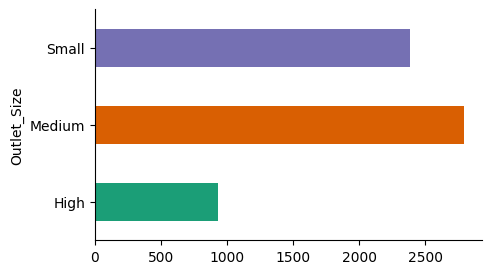

In [ ]:
big_mart.groupby('Outlet_Size').size().plot(kind='barh', figsize=(5,3),color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### 4. Outlet_Location_Type

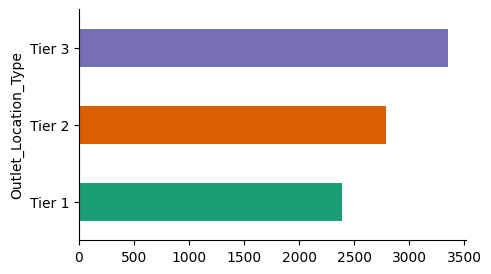

In [ ]:
import seaborn as sns
big_mart.groupby('Outlet_Location_Type').size().plot(kind='barh',figsize=(5,3), color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###5. Outlet_Type

<Axes: ylabel='Outlet_Type'>

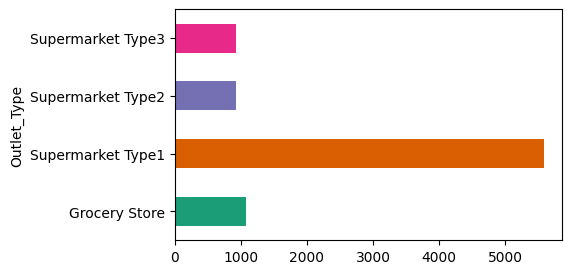

In [ ]:
big_mart.groupby('Outlet_Type').size().plot(kind='barh', figsize=(5,3),color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

###6. Item_Visibility

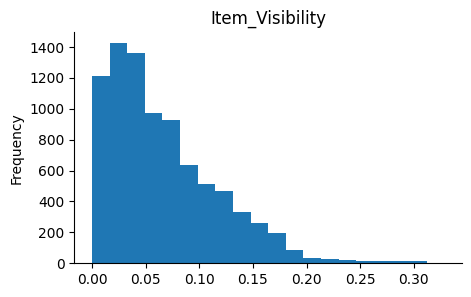

In [ ]:
big_mart['Item_Visibility'].plot(kind='hist',figsize=(5,3), bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 7. Item_Weight

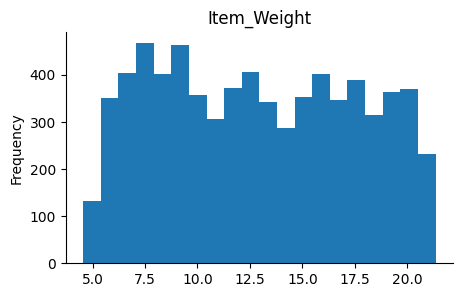

In [ ]:

big_mart['Item_Weight'].plot(kind='hist',figsize=(5,3), bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Categorical features
From the table above we can see which columns are categorical or numerical.
- item_identifier
- item_fat_content
- item_type
- outlet_identifier
- outlet_size
- outlet_location_type
- outlet_type


#Handling mIssing values
There are two methods for filling missing values in a numerical column:
- Univariate imputation: mean, median, mode imputation, constant value and interpolation.

- Bivariate/multivariate imputation: regression, k-nearest neighbors, machine learning imputation.

## Item_weight
The item_weight column has missing values. We can either use the mean or median to estimate the missing values and replace the missing values with our estimates.

###Univariate Imputation

In [ ]:
# mean value of "item_weight" column
print(big_mart['Item_Weight'].mean())
print(big_mart['Item_Weight'].median())

12.857645184135976
12.6


In [ ]:
#fill the missing values in the "item_weight" column with the mean value
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace= True) #inplace=True makes sure the values are reflected in the original table.

The code below is the code for the interpolation method but we will stick with the mean values

In [ ]:
#big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].interpolate(), inplace= True)
#The results we got using the mean imputation is good enough, so we'll stick with that.

In [ ]:
big_mart.isnull().sum() #to confirm the nulL rows have been filled

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Item_weight no longer has any mssing values.

###Multivariate Imputation
Below is the code for multivariate imputation but I already chose the mean imputation so we wont be using the multivariate results either.

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, weights='distance')

In [ ]:
#big_mart['knn_imputer'] = knn.fit_transform(big_mart[['Item_Weight']])

## Outlet_size
The other column with missing values is the outlet_size which is a categorical data type. Therefore, I won't be using the same method as I used for the numerical data type.

To replace the missing values in the outlet_size column, we create a pivot table combining both outlet type and outlet size with 'mode' as the aggregating function.

In [ ]:
big_mart['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [ ]:
# 1. Calculate the mode for each Outlet_Type:
mode_of_outlet_size = big_mart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0])).iloc[0]


In [ ]:
mode_of_outlet_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


This shows the mode value for the 'outlet_size' in the 'outlet_type' column

### Note: error
If the mode of  Grocery store returns a series. Tthe best thing will be to set the mode for 'grocery store' = 'small'

In [ ]:
#mode_of_outlet_size['Grocery Store'] = 'Small'

In [ ]:
mising_values_mode = big_mart['Outlet_Size'].isnull()
mising_values_mode

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [ ]:
big_mart.loc[mising_values_mode, 'Outlet_Size'] = big_mart.loc[mising_values_mode, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
#this locates all the missing values in the 'outlet_size' and replaces them withe mode values for the corresponding row in the 'outlet_type'

In [ ]:
big_mart['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Small
4,High
...,...
8518,High
8519,Small
8520,Small
8521,Medium


So we've successfully handled the missing value and replaced the mssinging rows with the mode.

## Data Preprocessing
Now i've handled the mssing values, the next step is to make sure the data is clean and processed for the model by taking care of any inconsistencies.

##1. Item_fat_content

In [ ]:
#convert categorical data to numerical values
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


We require consistent labelling. Reg = regular, LF = lowfat

In [ ]:
big_mart.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


###2. Item_visibilty

In [ ]:
big_mart['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


526 values have are 0.00.


In [ ]:
#replace the zero values with nan
big_mart['Item_Visibility_interpolate'] = big_mart['Item_Visibility'].replace(0, np.nan).interpolate(method='linear')
#after replacing the zero values with nan, i proceed to interpolate

In [ ]:
big_mart['Item_Visibility_interpolate'].value_counts()
#Let's check the distribution of the original "item_visibilty" vs "item_visibilty_interpolate"

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


<Axes: title={'center': 'Item_Visibility'}, ylabel='Density'>

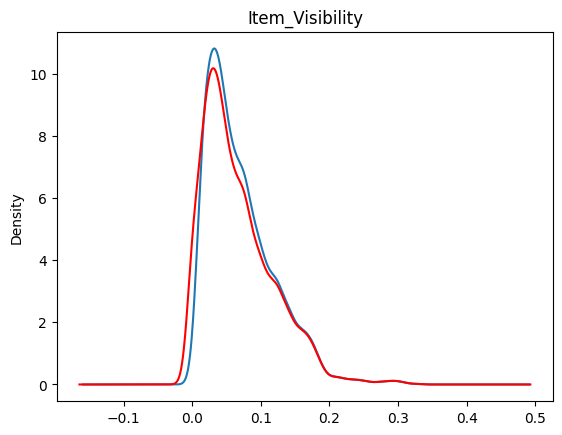

In [ ]:
big_mart['Item_Visibility_interpolate'].plot(kind='kde', title='Item_Visibility_interpolate')
big_mart['Item_Visibility'].plot(kind='kde', color='red', title='Item_Visibility')

We can drop the original big_mart['Item_Visibility'] because inspecting the graph they're almost identical

In [ ]:
big_mart.drop(columns='Item_Visibility', axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.016047
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.019278
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.016760
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.015755
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.014751
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.056783
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,0.046982
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.035186
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.145221


###3. Item type

In [ ]:
big_mart['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


### 4. Item identifier

In [ ]:
big_mart['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


It seems the first 2 letter are consstant: FD, NC, DR. so let's extract the first two letters.

In [ ]:
big_mart['Item_Identifier'] = big_mart['Item_Identifier'].apply(lambda x: x[0:2])

In [ ]:
big_mart['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


From the results, most of the products in the "item identifier" are either FD, NC or DR.

### 5. outlet_establishment_year

In [ ]:
big_mart['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


Let's convert the established year to age.

In [ ]:
import datetime as dt
current_year = dt.datetime.now().year
big_mart['Outlet_Establishment_Year'] = current_year - big_mart['Outlet_Establishment_Year']

In [ ]:
big_mart['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,25
1,15
2,25
3,26
4,37
...,...
8518,37
8519,22
8520,20
8521,15


## Data Encoding: Handling Categorical Data
Machine learning only understands numerical data. Therefore all categorical data must be converted to numerical data.

In [ ]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   object 
 1   Item_Weight                  8523 non-null   float64
 2   Item_Fat_Content             8523 non-null   object 
 3   Item_Visibility              8523 non-null   float64
 4   Item_Type                    8523 non-null   object 
 5   Item_MRP                     8523 non-null   float64
 6   Outlet_Identifier            8523 non-null   object 
 7   Outlet_Establishment_Year    8523 non-null   int64  
 8   Outlet_Size                  8523 non-null   object 
 9   Outlet_Location_Type         8523 non-null   object 
 10  Outlet_Type                  8523 non-null   object 
 11  Item_Outlet_Sales            8523 non-null   float64
 12  Item_Visibility_interpolate  8523 non-null   float64
dtypes: float64(5), int

In [ ]:
big_mart.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,25,Medium,Tier 1,Supermarket Type1,3735.1380,0.016047
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,15,Medium,Tier 3,Supermarket Type2,443.4228,0.019278
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,25,Medium,Tier 1,Supermarket Type1,2097.2700,0.016760


In [ ]:
big_mart_encoded = big_mart.copy()

In [ ]:
#slelect all columns that are data type 'object'
cat_columns = big_mart.select_dtypes(include=['object']).columns
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
for col in cat_columns:
  big_mart_encoded[col] = encoder.fit_transform(big_mart_encoded[col])
  print(col)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
big_mart_encoded.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate
0,1,9.30,0,0.016047,4,249.8092,9,25,1,0,1,3735.1380,0.016047
1,0,5.92,1,0.019278,14,48.2692,3,15,1,2,2,443.4228,0.019278
2,1,17.50,0,0.016760,10,141.6180,9,25,1,0,1,2097.2700,0.016760
3,1,19.20,1,0.000000,6,182.0950,0,26,2,2,0,732.3800,0.015755
4,2,8.93,0,0.000000,9,53.8614,1,37,0,2,1,994.7052,0.014751


In [ ]:
big_mart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,25,Medium,Tier 1,Supermarket Type1,3735.1380,0.016047
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,15,Medium,Tier 3,Supermarket Type2,443.4228,0.019278
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,25,Medium,Tier 1,Supermarket Type1,2097.2700,0.016760
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,26,Small,Tier 3,Grocery Store,732.3800,0.015755
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,37,High,Tier 3,Supermarket Type1,994.7052,0.014751


Clearly, all the categorical columns have been converted to numerical data type

In [ ]:
#drop the target variable 'item_outlet_sales'
X = big_mart_encoded.drop(columns='Item_Outlet_Sales', axis=1)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_interpolate
0,1,9.300,0,0.016047,4,249.8092,9,25,1,0,1,0.016047
1,0,5.920,1,0.019278,14,48.2692,3,15,1,2,2,0.019278
2,1,17.500,0,0.016760,10,141.6180,9,25,1,0,1,0.016760
3,1,19.200,1,0.000000,6,182.0950,0,26,2,2,0,0.015755
4,2,8.930,0,0.000000,9,53.8614,1,37,0,2,1,0.014751
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,37,0,2,1,0.056783
8519,1,8.380,1,0.046982,0,108.1570,7,22,2,1,1,0.046982
8520,2,10.600,0,0.035186,8,85.1224,6,20,2,1,1,0.035186
8521,1,7.210,1,0.145221,13,103.1332,3,15,1,2,2,0.145221


In [ ]:
Y = big_mart_encoded['Item_Outlet_Sales']

##Model Evaulation

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=200, random_state=42)
scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')
print(scores.mean())

0.5523841558675254


## XGBRFRegressor

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=200, random_state=42)
scores = cross_val_score(xg, X, Y, cv=5, scoring='r2')
print(scores.mean())


0.5951884945743309


  XGBRFRegressor did slightly better

## XGBRFRegressor Importance
Let's find out which features carry more weight.

In [ ]:
xg1  = XGBRFRegressor(n_estimators=200, random_state=42)

xg1.fit(X, Y)

pd.DataFrame({'Features':X.columns,
             'XGBRF_importance': xg1.feature_importances_}).sort_values(by='XGBRF_importance', ascending=False)

,Features,XGBRF_importance
10,Outlet_Type,0.539013
5,Item_MRP,0.121367
7,Outlet_Establishment_Year,0.118452
6,Outlet_Identifier,0.113187
8,Outlet_Size,0.088109
9,Outlet_Location_Type,0.011282
11,Item_Visibility_interpolate,0.002616
3,Item_Visibility,0.002087
4,Item_Type,0.001541
1,Item_Weight,0.000895


Lets drop the columns of low importance. That is all the column below 'Outlet_Location_Type'

In [ ]:
from xgboost import XGBRFRegressor

xg1 = XGBRFRegressor(n_estimators=200, random_state=42)
scores = cross_val_score(xg1, X.drop(['Item_Visibility_interpolate','Item_Visibility', 'Item_Type', 'Item_Weight', 'Item_Identifier', 'Item_Fat_Content'], axis=1), Y, cv=5, scoring='r2')
print(scores.mean())

0.5955719920835973


In [ ]:
final_data = X.drop(['Item_Visibility_interpolate','Item_Visibility', 'Item_Type', 'Item_Weight', 'Item_Identifier', 'Item_Fat_Content'], axis=1)

In [ ]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,9,25,1,0,1
1,48.2692,3,15,1,2,2
2,141.6180,9,25,1,0,1
3,182.0950,0,26,2,2,0
4,53.8614,1,37,0,2,1
...,...,...,...,...,...,...
8518,214.5218,1,37,0,2,1
8519,108.1570,7,22,2,1,1
8520,85.1224,6,20,2,1,1
8521,103.1332,3,15,1,2,2


## Best Model
XGBoost was the better model, so let's use the finaal data on the xgboost model.

In [ ]:
from xgboost import XGBRFRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(final_data, Y, test_size=0.2, random_state=42)

In [ ]:
xg_final = XGBRFRegressor(n_estimators=1000, random_state=42,learning_rate=1, booster=('dart'))
xg_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster='dart', callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [ ]:
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test, y_pred)

713.5465928099799

In [ ]:
r2_score(y_test, xg_final.predict(X_test))

0.61781809159252

This is model did better than previous models.

In [ ]:
#cross validation score
scores = cross_val_score(xg_final, X_test, y_test, cv=5, scoring='r2')
print(scores.mean())

0.6017180571596746


###Model prediction visualization

In [ ]:
plot_data = pd.DataFrame()
plot_data['y_test'] = y_test
plot_data['y_pred'] = y_pred

<Axes: title={'center': 'prediction'}, ylabel='Density'>

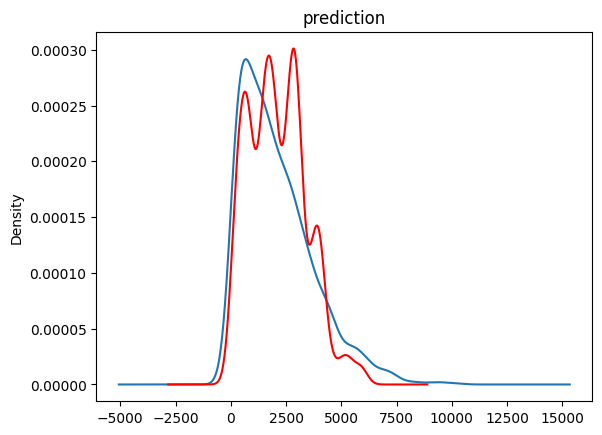

In [ ]:
plot_data['y_test'].plot(kind='kde', title='Item_sales')
plot_data['y_pred'].plot(kind='kde', color='red', title='prediction')

Let's try experiment with other models to see if we can achieve a better perfirmance.

##Neural network model

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

#create the model
med_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
med_model.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
                  metrics=['mae'])
med_model.fit(X_train, y_train, batch_size=64, epochs=250)

Epoch 1/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1180.6610 - mae: 1180.6610
Epoch 2/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 967.6472 - mae: 967.6472
Epoch 3/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 943.0638 - mae: 943.0638
Epoch 4/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 927.7822 - mae: 927.7822
Epoch 5/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 926.8887 - mae: 926.8887
Epoch 6/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 923.1761 - mae: 923.1761
Epoch 7/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 919.6769 - mae: 919.6769
Epoch 8/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 921.1751 - mae: 921.1751
Epoch 9/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 916.8447 - mae: 916.8447
Epoch 10/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 917.0629 - mae: 917.0629
Epoch 11/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 914.9316 - mae: 914.9316
Epoch 12/250
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

In [ ]:
neural_net_pred = med_model.predict(X_test)
mean_absolute_error(y_test, neural_net_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


733.8097165869426

The mean absolute error for the XGBoost model is approx 713. Which is slightly
better than the neural network performance.

### Neural network prediction VS XGBoost and Actual data

In [ ]:
plot_data['neural_net_pred'] = neural_net_pred

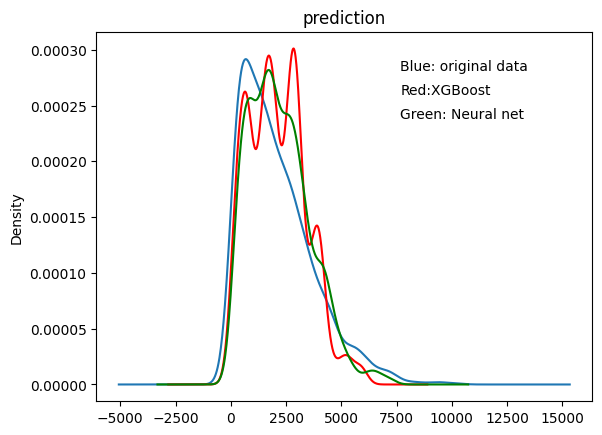

In [ ]:
plot_data['y_test'].plot(kind='kde', title='Item_sales')
plot_data['y_pred'].plot(kind='kde', color='red', title='prediction')
plot_data['neural_net_pred'].plot(kind='kde', color='green', title='prediction')
plt.figtext(0.6, 0.8,'Blue: original data')
plt.figtext(0.6, 0.75, 'Red:XGBoost')
plt.figtext(0.6, 0.70,'Green: Neural net')
plt.show()

From the graph we can see how well the models are performing on the test data.
- Blue line: 'Actual sales
- Red line: XGBoost predictions
- Green line: Neural network predictions

So how can we improve the model score? Let's try ensemble method

##Ensemble method
This involves combining multiple models and then using a meta model to make the final prediction.
In this case, XGBoost and Neural network models are combined and then a linear regression model is used as the final model.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#stack predictions
stacked_prediction = np.column_stack((y_pred, neural_net_pred))

In [ ]:
xg_final_stacking = XGBRFRegressor(n_estimators=1000, random_state=42,learning_rate=1, booster=('dart'))
xg_final_stacking.fit(stacked_prediction, y_test)

XGBRFRegressor(base_score=None, booster='dart', callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [ ]:
final_pred_xgb = xg_final_stacking.predict(stacked_prediction)
mean_absolute_error(y_test, final_pred_xgb)

660.5086702293347

In [ ]:
y_test.shape

(1705,)

In [ ]:
lr.fit(final_pred_xgb.reshape(-1, 1), y_test)
final_pred_linear = lr.predict(final_pred_xgb.reshape(-1, 1))
mean_absolute_error(y_test, final_pred_linear)

659.6469847460436

The prediction is almost the same as XGBoost.

In [ ]:
xg_final_stacking = XGBRFRegressor(n_estimators=1000, random_state=42,learning_rate=1, booster=('dart'))
xg_final_stacking.fit(stacked_prediction, y_test)

XGBRFRegressor(base_score=None, booster='dart', callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [ ]:
final_pred_xgb = xg_final_stacking.predict(stacked_prediction)
mean_absolute_error(y_test, final_pred_xgb)

660.5086702293347

This is the best MAE score so far.

In [ ]:
plot_data['final_pred_xgb'] = final_pred_xgb
plot_data['final_pred_linear'] = final_pred_linear

## Model's prediction visualization

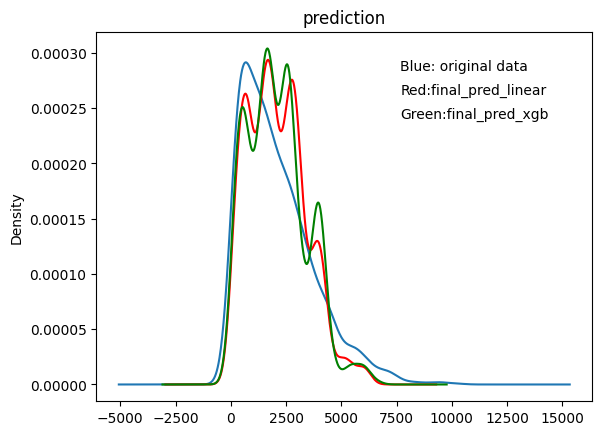

In [ ]:
plot_data['y_test'].plot(kind='kde', title='Item_sales')
plot_data['final_pred_linear'].plot(kind='kde', color='red', title='prediction')
plot_data['final_pred_xgb'].plot(kind='kde', color='green', title='prediction')
plt.figtext(0.6, 0.8,'Blue: original data')
plt.figtext(0.6, 0.75, 'Red:final_pred_linear')
plt.figtext(0.6, 0.70,'Green:final_pred_xgb')
plt.show()

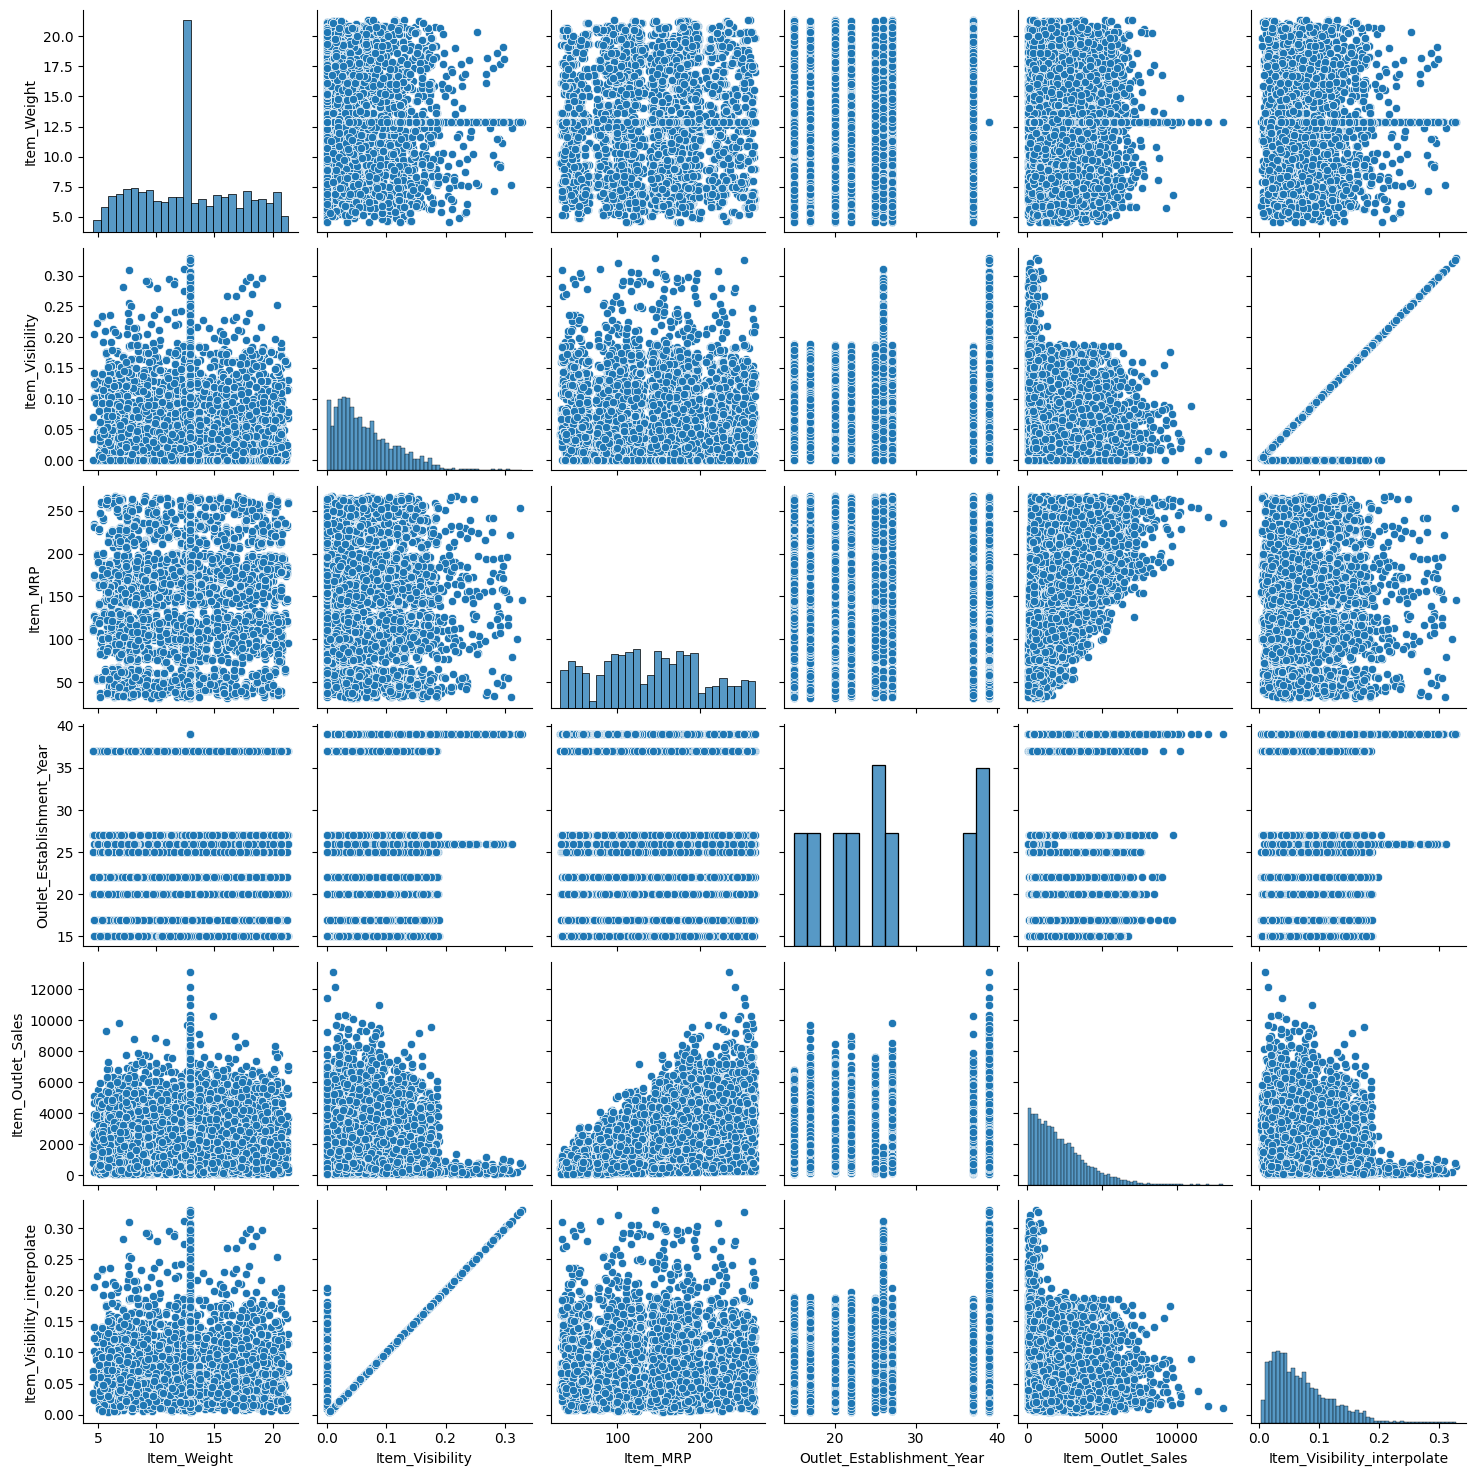

In [ ]:
sns.pairplot(big_mart)

<ipython-input-84-891c99a8c39b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart.Item_Weight)


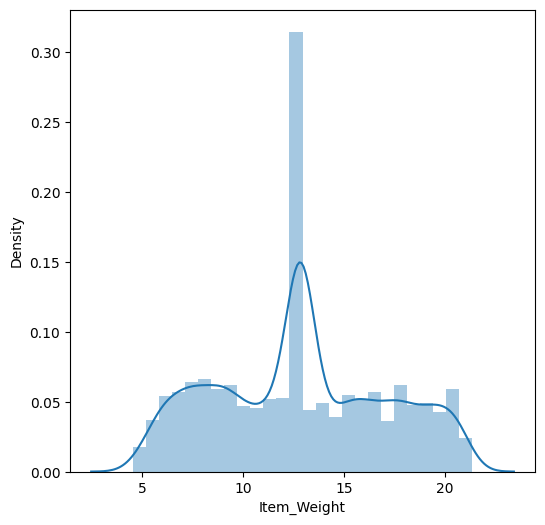

In [ ]:
#item weught distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart.Item_Weight)
plt.show()

<ipython-input-85-12725df432be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart.Item_Visibility)


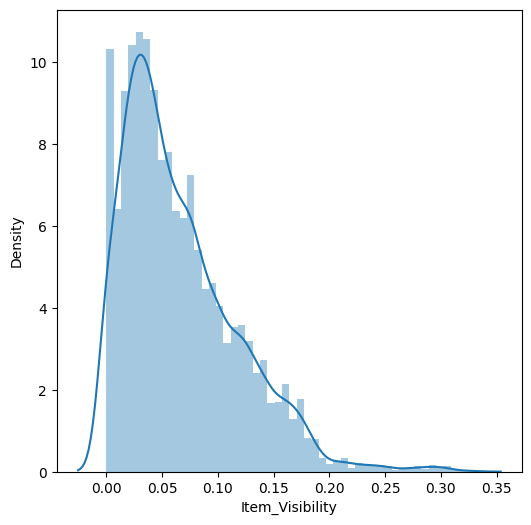

In [ ]:
#item visisbilty distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart.Item_Visibility)
plt.show()

<ipython-input-86-891c99a8c39b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart.Item_Weight)


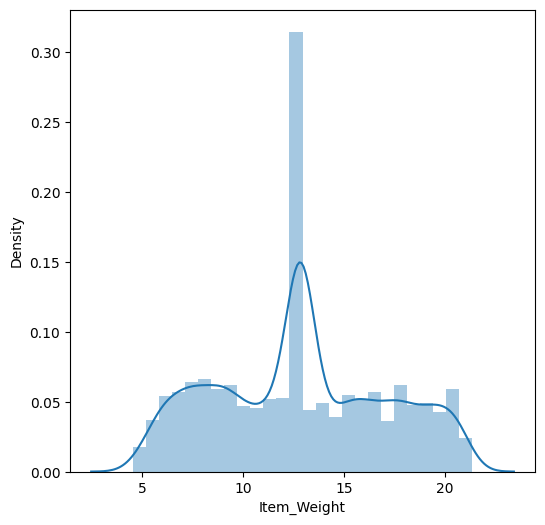

In [ ]:
#item weught distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart.Item_Weight)
plt.show()

<ipython-input-87-1ccf4b05a25e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart.Item_MRP)


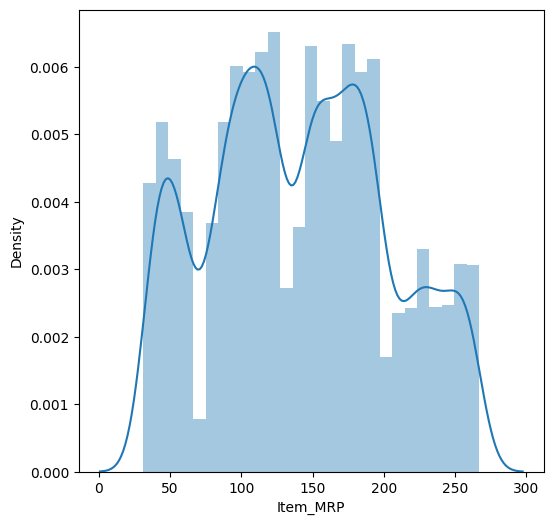

In [ ]:
#item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart.Item_MRP)
plt.show()

In [ ]:
#item outlet_sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart.Item_outlet_sales)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Item_outlet_sales'

<Figure size 600x600 with 0 Axes>

In [ ]:
#Outlet establishment year count plot
plt.figure(figsize=(6,6))
sns.countplot(big_mart.Outlet_Establishment_Year)
plt.show()

Categorical Features

In [ ]:
#Item fat content count plot
plt.figure(figsize=(6,6))
sns.countplot(big_mart.Item_fat_content)
plt.show()

In [ ]:
#Item type count plot
plt.figure(figsize=(20,6))
sns.countplot(big_mart.Item_type)
plt.show()

In [ ]:
#Outlet_size count plot
plt.figure(figsize=(6,6))
sns.countplot(big_mart.Outlet_size)
plt.show()